# 버섯인지 사물인지 구분

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from glob import glob

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from itertools import cycle
from sklearn.model_selection import train_test_split


import cv2
import os
print(os.listdir("thing_mush/"))

['test_set', 'train_set']


In [2]:
EPOCHS                  = 30
IMGSIZE                 = 200
CHANNELS                = 3 # grayscale
BATCH_SIZE              = 32
STOPPING_PATIENCE       = 8
VERBOSE                 = 1
OPTIMIZER               = 'adam'
TRAINING_DIR            = 'thing_mush/train_set/train_set/'
TEST_DIR                = 'thing_mush/test_set/test_set/'

In [3]:
generator = ImageDataGenerator(rescale=1./255, 
                               shear_range=0.15, 
                               zoom_range=0.2, 
                               horizontal_flip=True
                              ) 

train_data = generator.flow_from_directory(TRAINING_DIR, 
                                            target_size=(IMGSIZE, IMGSIZE),
                                            classes = ['mushrooms', 'things'],
                                            color_mode='rgb', 
                                            batch_size=BATCH_SIZE,
                                            class_mode = 'binary'
                                            )


test_data = generator.flow_from_directory(TEST_DIR, 
                                           target_size=(IMGSIZE, IMGSIZE), 
                                           classes = ['mushrooms', 'things'],
                                           color_mode='rgb', 
                                           batch_size=BATCH_SIZE,
                                           class_mode = 'binary',
                                           shuffle=False
                                           )

Found 1278 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


# 모델 만들기

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMGSIZE, IMGSIZE, CHANNELS)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

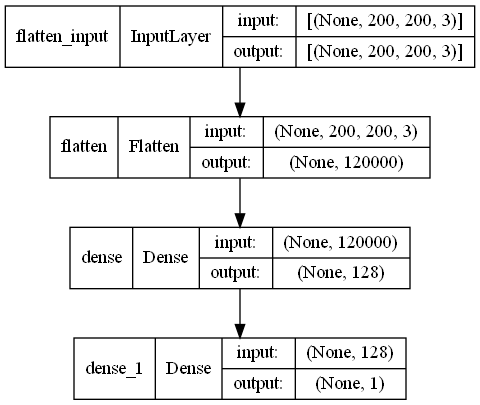

In [6]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [7]:
history = model.fit(train_data,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = test_data,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 21s 3s/step - loss: 21.1246 - accuracy: 0.5781 - val_loss: 0.9440 - val_accuracy: 0.8086
Epoch 2/15
8/8 [==============================] - 16s 2s/step - loss: 10.8487 - accuracy: 0.5118 - val_loss: 13.5947 - val_accuracy: 0.5039
Epoch 3/15
8/8 [==============================] - 16s 2s/step - loss: 4.6229 - accuracy: 0.7227 - val_loss: 0.7347 - val_accuracy: 0.8828
Epoch 4/15
8/8 [==============================] - 16s 2s/step - loss: 2.9160 - accuracy: 0.7891 - val_loss: 3.6399 - val_accuracy: 0.7734
Epoch 5/15
8/8 [==============================] - 16s 2s/step - loss: 3.9044 - accuracy: 0.8008 - val_loss: 0.2769 - val_accuracy: 0.9375
Epoch 6/15
8/8 [==============================] - 16s 2s/step - loss: 2.9984 - accuracy: 0.7930 - val_loss: 1.8926 - val_accuracy: 0.8164
Epoch 7/15
8/8 [==============================] - 16s 2s/step - loss: 2.1842 - accuracy: 0.8477 - val_loss: 2.1525 - val_accuracy: 0.7773
Epoch 8/15
8/8 [===============

# Accuracy와 Loss 시각화

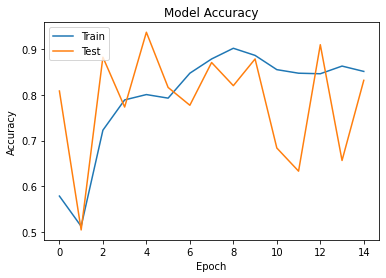

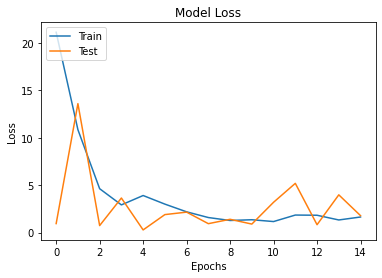

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 예상 함수 만들기

In [18]:
def mushroom():

    import numpy as np
    from keras.preprocessing import image

    from tkinter import filedialog
    from tkinter import messagebox
    
    file_list = [] #파일 목록 담을 리스트 생성
    file = filedialog.askopenfilenames(initialdir="/",
                     title = "파일을 선택 해 주세요",
                        filetypes = (("*.jpg","*jpg"),("*.png","png"),("*.csv","*csv")))
    #files 변수에 선택 파일 경로 넣기

    if file == '':
        messagebox.showwarning("경고", "파일('jpg, png')을 추가 하세요") #파일 선택 안했을 때 메세지 출력

    file=''.join(file) 

    
    
    # 이미지 load 및 예측
    img = image.load_img(file, target_size=(200, 200))
    x = image.img_to_array(img)
    plt.figure(figsize=(5, 5))
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]<0.5:
        plt.title(f"It looks like a mushroom")
        plt.axis(False);
    else:
        plt.title(f"It doesn't look like a mushroom.")
        plt.axis(False);

[0.]


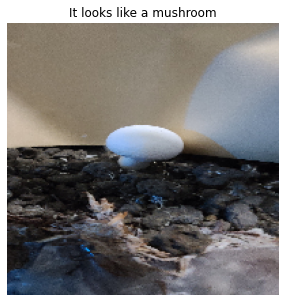

In [23]:
mushroom()

[1.]


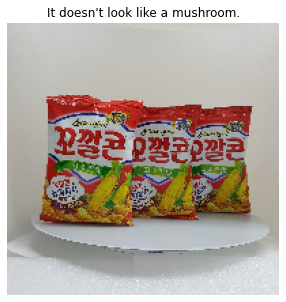

In [20]:
mushroom()

In [13]:
# H5 format에 모델저장
# model.save('cnn_mushroom.h5')

In [14]:
# from tensorflow.keras.models import load_model
# model = load_model('cnn_mushroom.h5')